# Escuela Politécnica Nacional

## Nombre: Stiv Quishpe 

Resolver los literales 3 y 4 

3) Diríjase al pseudocódigo del spline cúbico con frontera natural provisto en clase, en base a ese pseudocódigo complete la siguiente función:

In [1]:
import sympy as sym
from IPython.display import display

# Definir la función para la interpolación cúbica
def spline_cubica(xs: list[float], ys: list[float]) -> list[sym.Symbol]:
    """
    Interpolación cúbica ``S``. Cada dos puntos se interpolan mediante un polinomio cúbico
    ``S_j`` de la forma ``S_j(x) = a_j + b_j(x - x_j) + c_j(x - x_j)^2 + d_j(x - x_j)^3.``

    xs deben ser diferentes pero no necesariamente ordenados ni igualmente espaciados.

    ## Parámetros
    - xs, ys: puntos a interpolar

    ## Retorno
    - Lista de expresiones simbólicas para la interpolación cúbica.
    """

    puntos = sorted(zip(xs, ys), key=lambda x: x[0])  # ordenar puntos por x

    xs = [x for x, _ in puntos]
    ys = [y for _, y in puntos]

    n = len(puntos) - 1  # número de splines

    h = [xs[i + 1] - xs[i] for i in range(n)]  # distancias entre xs contiguos

    # Calcular alpha
    alpha = [0] * (n + 1)
    for i in range(1, n):
        alpha[i] = 3 / h[i] * (ys[i + 1] - ys[i]) - 3 / h[i - 1] * (ys[i] - ys[i - 1])

    # Resolver el sistema tridiagonal
    l = [1]
    u = [0]
    z = [0]

    for i in range(1, n):
        l.append(2 * (xs[i + 1] - xs[i - 1]) - h[i - 1] * u[i - 1])
        u.append(h[i] / l[i])
        z.append((alpha[i] - h[i - 1] * z[i - 1]) / l[i])

    l.append(1)
    z.append(0)
    c = [0] * (n + 1)

    x = sym.Symbol("x")
    splines = []
    for j in range(n - 1, -1, -1):
        c[j] = z[j] - u[j] * c[j + 1]
        b = (ys[j + 1] - ys[j]) / h[j] - h[j] * (c[j + 1] + 2 * c[j]) / 3
        d = (c[j + 1] - c[j]) / (3 * h[j])
        a = ys[j]
        S = a + b * (x - xs[j]) + c[j] * (x - xs[j])**2 + d * (x - xs[j])**3

        splines.append(S)
    splines.reverse()
    return splines


# Probar con puntos
xs = [0, 1, 2]
ys = [-5, -4, 3]

splines = spline_cubica(xs=xs, ys=ys)
_ = [display(s) for s in splines]
print("______")
_ = [display(s.expand()) for s in splines]


1.5*x**3 - 0.5*x - 5

4.0*x - 1.5*(x - 1)**3 + 4.5*(x - 1)**2 - 8.0

______


1.5*x**3 - 0.5*x - 5

-1.5*x**3 + 9.0*x**2 - 9.5*x - 2.0

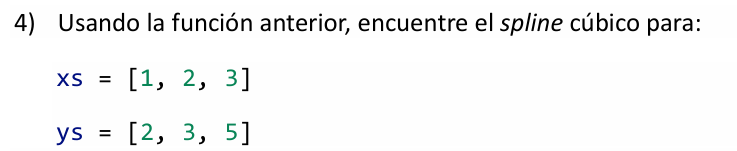

In [3]:
import sympy as sym
from IPython.display import display

# Definir la función para la interpolación cúbica
def spline_cubica(xs: list[float], ys: list[float]) -> list[sym.Symbol]:
    """
    Interpolación cúbica ``S``. Cada dos puntos se interpolan mediante un polinomio cúbico
    ``S_j`` de la forma ``S_j(x) = a_j + b_j(x - x_j) + c_j(x - x_j)^2 + d_j(x - x_j)^3.``
    
    xs deben ser diferentes pero no necesariamente ordenados ni igualmente espaciados.

    ## Parámetros
    - xs, ys: puntos a interpolar

    ## Retorno
    - Lista de expresiones simbólicas para la interpolación cúbica.
    """

    puntos = sorted(zip(xs, ys), key=lambda x: x[0])  # ordenar puntos por x

    xs = [x for x, _ in puntos]
    ys = [y for _, y in puntos]

    n = len(puntos) - 1  # número de splines

    h = [xs[i + 1] - xs[i] for i in range(n)]  # distancias entre xs contiguos

    # Calcular alpha
    alpha = [0] * (n + 1)
    for i in range(1, n):
        alpha[i] = 3 / h[i] * (ys[i + 1] - ys[i]) - 3 / h[i - 1] * (ys[i] - ys[i - 1])

    # Resolver el sistema tridiagonal
    l = [1]
    u = [0]
    z = [0]

    for i in range(1, n):
        l.append(2 * (xs[i + 1] - xs[i - 1]) - h[i - 1] * u[i - 1])
        u.append(h[i] / l[i])
        z.append((alpha[i] - h[i - 1] * z[i - 1]) / l[i])

    l.append(1)
    z.append(0)
    c = [0] * (n + 1)

    x = sym.Symbol("x")
    splines = []
    for j in range(n - 1, -1, -1):
        c[j] = z[j] - u[j] * c[j + 1]
        b = (ys[j + 1] - ys[j]) / h[j] - h[j] * (c[j + 1] + 2 * c[j]) / 3
        d = (c[j + 1] - c[j]) / (3 * h[j])
        a = ys[j]
        S = a + b * (x - xs[j]) + c[j] * (x - xs[j])**2 + d * (x - xs[j])**3

        splines.append(S)
    splines.reverse()
    return splines

# Probar con puntos
xs = [1, 2, 3]
ys = [3, 1, 5]

splines = spline_cubica(xs=xs, ys=ys)
_ = [display(s) for s in splines]
print("______")
_ = [display(s.expand()) for s in splines]


-3.5*x + 1.5*(x - 1)**3 + 6.5

1.0*x - 1.5*(x - 2)**3 + 4.5*(x - 2)**2 - 1.0

______


1.5*x**3 - 4.5*x**2 + 1.0*x + 5.0

-1.5*x**3 + 13.5*x**2 - 35.0*x + 29.0